In [44]:
# Import Libraries 
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Decide assets that make the portfolio
assets = ["AAPL", "GOOG", "NFLX", "AMZN", "META"]

# Assign weights to each asset/stock
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

# Decide time horizon 
start = dt.datetime(2013, 1, 1)
end = dt.datetime.now()

#Fetch stock price - (Adj. Close)
df = yf.download(assets, start, end)["Adj Close"]
df.head()

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02,16.837114,12.8655,18.013729,28.000000,13.144286
2013-01-03,16.624594,12.9240,18.024191,27.770000,13.798571
2013-01-04,16.161520,12.9575,18.380356,28.760000,13.711429
2013-01-07,16.066456,13.4230,18.300158,29.420000,14.171429
2013-01-08,16.109699,13.3190,18.264042,29.059999,13.880000


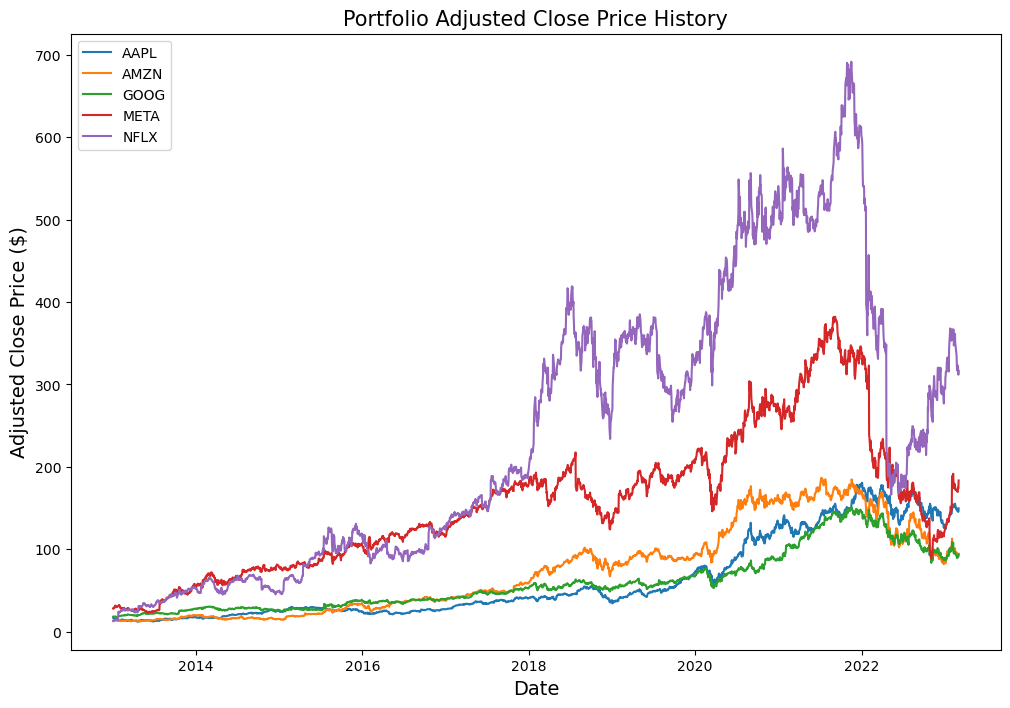

In [7]:
# Visualise the stocks that make the portfolio
plt.figure(figsize = (12, 8))
for column in df.columns.values: 
    plt.plot(df[column], label=column)
plt.title("Portfolio Adjusted Close Price History", fontsize = 15)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Adjusted Close Price ($)", fontsize = 14)
plt.legend(df.columns.values, loc = "upper left")
plt.show()

In [9]:
# Show Daily Simple Returns 
returns = df/df.shift(1) -1 
returns.head()

,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,0.004547,0.000581,-0.008214,0.049777
2013-01-04,-0.027855,0.002592,0.019760,0.035650,-0.006315
2013-01-07,-0.005882,0.035925,-0.004363,0.022949,0.033549
2013-01-08,0.002691,-0.007748,-0.001974,-0.012237,-0.020565


In [11]:
# Show Annualised Co-Variance Matrix 
annual_CovMatrix = returns.cov() *  252
annual_CovMatrix

,AAPL,AMZN,GOOG,META,NFLX
AAPL,0.084177,0.048059,0.045393,0.053847,0.043851
AMZN,0.048059,0.107596,0.056872,0.069197,0.074629
GOOG,0.045393,0.056872,0.075128,0.063497,0.056238
META,0.053847,0.069197,0.063497,0.150164,0.075013
NFLX,0.043851,0.074629,0.056238,0.075013,0.226764


In [17]:
# Calculate Portfolio Variance 

port_variance = np.dot(weights.T, np.dot(annual_CovMatrix, weights))
port_variance

0.07268091809535003

In [18]:
# Calculate portfolio standard deviation/volatility (risk)
port_volatility = np.sqrt(port_variance)
port_volatility

0.26959398749851604

In [19]:
# Get Annual Portfolio Return
annual_portfolio_return = np.sum(returns.mean()*weights)* 252
annual_portfolio_return

0.2787768908299882

In [28]:
# Expected portfolio annual return, volatility(risk), variance
percent_return = str(round(annual_portfolio_return,2) * 100) + "%"
percent_Vols = str(round(port_volatility, 2) * 100) + "%"
percent_var = str(round(port_variance,2) * 100) + "%"

print (f"Expected Annual Return: {percent_return}")
print(f"Annual Portfolio Risk: {percent_Vols}")
print(f"Annual Portfolio Variance: {percent_var}")

Expected Annual Return: 28.000000000000004%
Annual Portfolio Risk: 27.0%
Annual Portfolio Variance: 7.000000000000001%


In [46]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import expected_returns
from pypfopt import risk_models

In [35]:
# Portfolio Optimization

In [47]:
# Calculate the expected returns and annualised  covariance of assets
u = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimise for max sharpe ratio : (Measures performance against investment that is risk free)
ef_frontier = EfficientFrontier(u, S)
weights = ef_frontier.max_sharpe()
cleaned_weights = ef_frontier.clean_weights()
print(cleaned_weights)
ef_frontier.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.5975), ('AMZN', 0.06489), ('GOOG', 0.0), ('META', 0.0), ('NFLX', 0.33762)])
Expected annual return: 28.1%
Annual volatility: 28.5%
Sharpe Ratio: 0.92


(0.2813724052926508, 0.28465755711255863, 0.9181994251053714)

In [41]:
# Get the discrete allocation of share per asset
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [48]:
latest_prices = get_latest_prices(df)
weights = cleaned_weights

discrete_allocation = DiscreteAllocation(weights, latest_prices, total_portfolio_value=20000)
allocation, leftover = discrete_allocation.lp_portfolio()

print(f"Discrete Allocation: {allocation}")
print("Remaining Funds: ${:.2f}".format(leftover))

Discrete Allocation: {'AAPL': 80, 'AMZN': 14, 'NFLX': 21}
Remaining Funds: $109.22
